In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [1]:
!pwd

/content


# Selective Search 시각화 실습

In [2]:
!git clone https://github.com/chulminkw/DLCV.git

Cloning into 'DLCV'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
Receiving objects: 100% (234/234), 142.72 MiB | 34.50 MiB/s, done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Resolving deltas: 100% (89/89), done.


In [3]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp37-none-any.whl size=4359 sha256=8a63a6c57d866eea7153ff726e099e9b6dadf5c858e0bad6bd7989afca15809d
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


img shape: (450, 375, 3)
img type: <class 'numpy.ndarray'>

rgb: [[[ 85  85  85]
  [ 84  84  84]
  [ 75  75  75]
  ...
  [212 212 212]
  [215 215 215]
  [218 218 218]]

 [[ 83  83  83]
  [ 82  82  82]
  [ 73  73  73]
  ...
  [216 216 216]
  [220 220 220]
  [223 223 223]]

 [[ 80  80  80]
  [ 79  79  79]
  [ 71  71  71]
  ...
  [219 219 219]
  [225 225 225]
  [228 228 228]]

 ...

 [[214 214 214]
  [211 211 211]
  [213 213 213]
  ...
  [104 104 104]
  [112 112 112]
  [115 115 115]]

 [[221 221 221]
  [214 214 214]
  [215 215 215]
  ...
  [104 104 104]
  [105 105 105]
  [111 111 111]]

 [[237 237 237]
  [230 230 230]
  [230 230 230]
  ...
  [ 97  97  97]
  [ 97  97  97]
  [107 107 107]]]
rgb type: <class 'numpy.ndarray'>


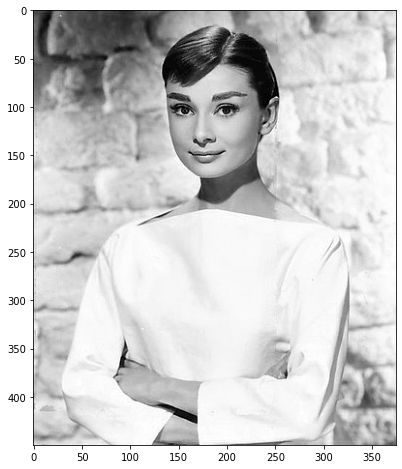

In [4]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

default_dir = '/content/DLCV'
# os.path.join : 경로 병합

img = cv2.imread(os.path.join(default_dir, 'data/image/audrey01.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV는 RGB가 아닌 BGR순으로 되어 있음. 그러므로 BGR->RGB로 바꾸기 for matplotlib으로 이미지 로드하기 위해
print('img shape:', img.shape) # img는 OpenCV에서 로드한 것이기 때문 BGR순으로 되어 있음
print('img type:', type(img))
print()
print('rgb:', img_rgb)
print('rgb type:', type(img_rgb))

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)  # img_rgb 는 nd-array 형태임
plt.show()

In [5]:
# selectivesearch의 selective_search() 메소드는 이미지의 Region proposal 정보(추천된 정보)를 반환
# scale : 큰 오브젝트를 할지, 작은 오브젝트를 할지 바운딩 박스시킬 오브젝트의 크기에 따라 조정할 수 있는 값(e.g 오브젝트 크기가 크면 값을 크게 주나..?)
# min_size : 추천해주는 영역 중 min_size 보다는 큰 바운딩 박스를 추천(e.g 2000 = 바운딩 박스 사각형 넓이)
# regions에 바운딩 박스값들이 모두 반환됨
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 41


In [6]:
# e.g) rect: (15, 0, 129, 110) -> 좌상돤 x,y좌표가 (15,0)이고 width=129, height=110인 바운딩 박스
# size : 바운딩 박스의 크기
# labels : 해당 바운딩 박스내의 오브젝트들의 고유 id
# 아래로 내려갈수록 너비와 높이 값이 큰 바운딩 박스가 나오며 끝의 바운딩 박스에 여러개의 오브젝트가 같이 있을 확률이 커짐
regions[:10]

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363}]

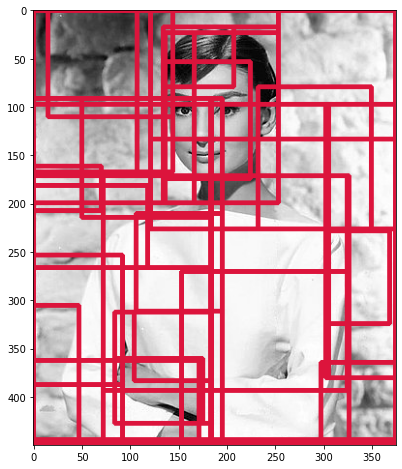

In [7]:
# rect 정보만 출력해 바운딩박스의 좌표와 너비, 높이 살펴보기
cand_rects = [cand['rect'] for cand in regions]

# openCV의 rectangle() 메소드를 이용해 바운딩박스 시각화하기
# rectangle() 인자로 이미지, 이미지의 좌상단 좌표, 우하단 좌표, box컬러색, 두께 등을 인자로 입력

red_rgb = (220,20,60)  # 바운딩 박스 색깔
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:

  left = rect[0]  # 좌상단 x좌표
  top = rect[1]  # 좌상단 y좌표
  right = left + rect[2] # 우하단 x좌표
  bottom = top + rect[3]  # 우하단 y좌표

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom),
                               color=red_rgb, thickness=3)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()


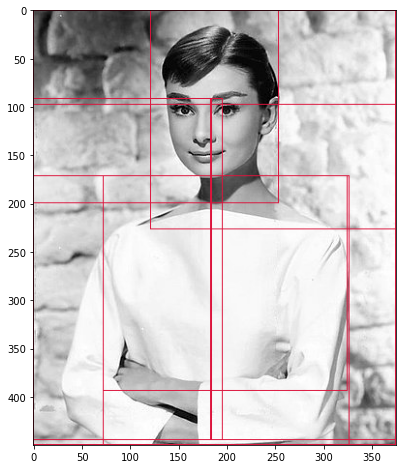

In [8]:
# 바운딩 박스 중 특정 사이즈보다 큰 박스들만 시각화하기
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 21000]

red_rgb = (220,20,60)
img_rgb_copy2 = img_rgb.copy()
for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy2 = cv2.rectangle(img_rgb_copy2, (left, top), (right, bottom),
                                color=red_rgb, thickness=1)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy2)
plt.show()

# IOU 구하기 실습

In [10]:
import numpy as np

# cand_box : 후보 바운딩 박스들
# gt_box : 실제 바운딩 박스
# 위 박스들은 [x1, y1, width, height]로 담겨있어서 함수를 통해 [x1, y1, x2, y2]로 바꾸어주자
def compute_iou(cand_box, gt_box):
  # 공통영역 계산하기
  x1 = np.maximum(cand_box[0], gt_box[0])
  y1 = np.maximum(cand_box[1], gt_box[1])
  x2 = np.minimum(cand_box[2], gt_box[2])
  y2 = np.minimum(cand_box[3], gt_box[3])

  intersection = np.abs(x2 - x1) * np.abs(y2 - y1)
  cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
  gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
  union = cand_box_area + gt_box_area - intersection

  iou = intersection / union

  return iou

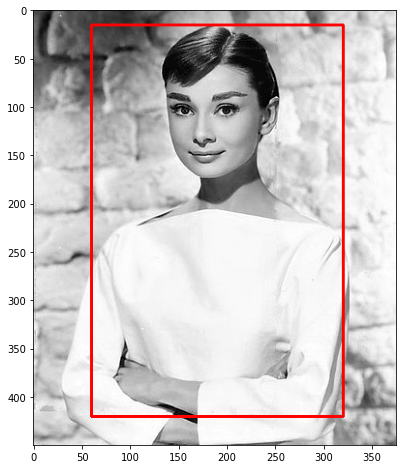

In [12]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Ground Truth 박스 임의로 설정
gt_box = [60, 15, 320, 420]

default_dir = '/content/DLCV'
img = cv2.imread(os.path.join(default_dir, 'data/image/audrey01.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0, 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]),
                        (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [13]:
import selectivesearch

_, regions = selectivesearch.selective_search(img_rgb, scale=100,
                                              min_size=2000)
print(type(regions), len(regions))

<class 'list'> 53


In [18]:
cand_rects = [cand['rect'] for cand in regions]
for idx, cand_box in enumerate(cand_rects):
  cand_box = list(cand_box)
  # x2, y2 좌표를 만들기 위한 로직
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)
  print("index:", idx, "iou:", iou)

index: 0 iou: 0.004042698919162727
index: 1 iou: 0.0713319505816575
index: 2 iou: 0.1134453781512605
index: 3 iou: 0.9874899187876287
index: 4 iou: 0.9748907882241216
index: 5 iou: 0.09851851851851852
index: 6 iou: 0.04228869895536562
index: 7 iou: 0.15042735042735042
index: 8 iou: 0.14541310541310543
index: 9 iou: 0.10112060778727446
index: 10 iou: 0.1194681861348528
index: 11 iou: 0.14017094017094017
index: 12 iou: 0.0063479062148049555
index: 13 iou: 0.0012531328320802004
index: 14 iou: 0.5933903133903133
index: 15 iou: 0.0017654198389054397
index: 16 iou: 0.0853656220322887
index: 17 iou: 0.12535612535612536
index: 18 iou: 0.0037709793923943065
index: 19 iou: 0.1498762283399595
index: 20 iou: 0.009658783173858097
index: 21 iou: 0.05242165242165242
index: 22 iou: 0.002331321996708722
index: 23 iou: 0.050123456790123457
index: 24 iou: 0.07313390313390314
index: 25 iou: 0.009348810110697799
index: 26 iou: 0.003843424242144944
index: 27 iou: 0.23817663817663817
index: 28 iou: 0.1871948

Image shape: (450, 375, 3)
index: 0 iou: 0.5008648690956052 rectangle: [63, 171, 374, 449]
index: 1 iou: 0.7389566501483806 rectangle: [63, 0, 374, 449]
index: 2 iou: 0.6270619201314865 rectangle: [0, 0, 374, 449]
index: 3 iou: 0.6270619201314865 rectangle: [0, 0, 374, 449]
index: 4 iou: 0.6270619201314865 rectangle: [0, 0, 374, 449]


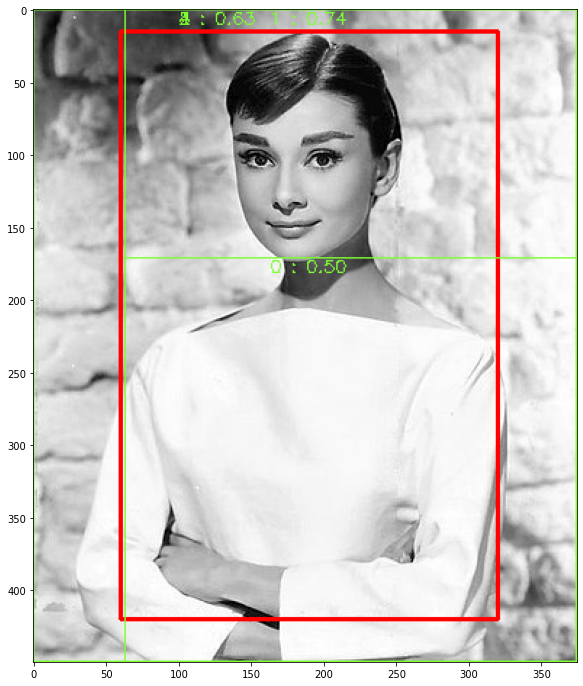

In [28]:
img = cv2.imread(os.path.join(default_dir, 'data/image/audrey01.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('Image shape:', img_rgb.shape)

green_rgb = (125, 255, 50)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 50000]
gt_box = [60, 15, 320, 420]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]),
                        (gt_box[2], gt_box[3]), color=red,
                        thickness=2)

for idx, cand_box in enumerate(cand_rects):
  # x2, y2 좌표 만들기
  cand_box = list(cand_box)
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)

  if iou > 0.5:
    print('index:', idx, 'iou:', iou, 'rectangle:', cand_box)
    # iou가 0.5가 넘은 후보 바운딩 박스들 이미지에 표시
    cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]),
                  (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
    text = "{} : {:.2f}".format(idx, iou)
    # 텍스트를 이미지에 넣기 -> 텍스트 위치도 cand_box 좌표에 따라 넣어주기 설정!
    cv2.putText(img_rgb, text, (cand_box[0]+100, cand_box[1]+10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()